In [1]:
#import libraries for nerualnet, math and visualization
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
import pathlib
from zipfile import ZipFile
from tensorflow.keras import datasets, layers, models
print(tf.__version__)

2.8.0


# First CNN Creation (find non-empty spaces)

In [2]:
#Download labels and images for CNN training and testing
labels = tf.keras.utils.get_file(
    'labels.zip',  "https://github.com/Nicolas-Ga/Chess_Digitization/blob/main/labels.zip?raw=true",
    cache_dir='.', cache_subdir='labels',
    extract=True)
images = tf.keras.utils.get_file(
    'images.zip',  "https://github.com/Nicolas-Ga/Chess_Digitization/blob/main/images.zip?raw=true",
    cache_dir='.', cache_subdir='images',
    extract=True)

8339456/8323925 [==============================] - 0s 0us/step


In [3]:
#Separate and format labels for training and testing
train_labels = []
for i in range(0, 72):
  name = "/content/labels/" + str(i) + ".csv"
  my_data = np.genfromtxt(name, delimiter=',')
  my_data = np.flip(my_data, 0)
  my_data = my_data.flatten()
  train_labels.append(np.asarray(my_data.astype(int)))
train_labels = (np.array(train_labels)).flatten()

test_labels = []
for i in range(72, 103):
  name = "/content/labels/" + str(i) + ".csv"
  my_data = np.genfromtxt(name, delimiter=',')
  my_data = np.flip(my_data, 0)
  my_data = my_data.flatten()
  test_labels.append(np.asarray(my_data.astype(int)))
test_labels = (np.array(test_labels)).flatten()

In [4]:
#Separate and format images for training and testing
train_images = []
for i in range(0, 72):
  for x in range(0,8):
    for y in range(0,8):
      name = "/content/images/" + str(i) + "_" + str(x) + "_" + str(y) + ".CSV"
      my_data = np.genfromtxt(name,delimiter=",")
      train_images.append(np.asarray(my_data.astype(int)))
train_images = np.array(train_images)

test_images = []
for i in range(72, 103):
  for x in range(0,8):
    for y in range(0,8):
      name = "/content/images/" + str(i) + "_" + str(x) + "_" + str(y) + ".CSV"
      my_data = np.genfromtxt(name,delimiter=",")
      test_images.append(np.asarray(my_data.astype(int)))
test_images = np.array(test_images)

In [ ]:
print(test_images.shape)
print(train_images.shape)
print(train_labels.shape)

(1984, 32, 32)
(4608, 32, 32)
(4608,)


In [ ]:
count = np.zeros((13,), dtype=int)
for i in range(0,4608):
  temp = train_labels[i]
  count[temp] += 1;
print(count)
count = np.zeros((13,), dtype=int)
for i in range(0,1984):
  temp = test_labels[i]
  count[temp] += 1;
print(count)

[2357   72   72   72   72  144  144  144  144  144  144  550  549]
[992  31  31  31  31  62  62  62  62  62  62 248 248]


In [5]:
#Add extra kings and queens
kq_labels = []
for i in range(103, 136):
  name = "/content/labels/" + str(i) + ".csv"
  my_data = np.genfromtxt(name, delimiter=',')
  my_data = np.flip(my_data, 0)
  my_data = my_data.flatten()
  kq_labels.append(np.asarray(my_data.astype(int)))
kq_labels = (np.array(kq_labels)).flatten()

kq_images = []
for i in range(103, 136):
  for x in range(0,8):
    for y in range(0,8):
      name = "/content/images/" + str(i) + "_" + str(x) + "_" + str(y) + ".CSV"
      my_data = np.genfromtxt(name,delimiter=",")
      kq_images.append(np.asarray(my_data.astype(int)))
kq_images = np.array(kq_images)

kq_images = kq_images[kq_labels != 0]
kq_labels = kq_labels[kq_labels != 0]

train_labels = np.append(train_labels, kq_labels, axis=0)
train_images = np.append(train_images, kq_images, axis=0)

In [ ]:
print(test_images.shape)
print(train_images.shape)
print(train_labels.shape)
print(kq_images.shape)

(1984, 32, 32)
(4740, 32, 32)
(4740,)
(132, 32, 32)


10
[[ 88 102 149 ... 176 175 175]
 [106  85 154 ... 175 175 175]
 [100  82 187 ... 174 174 174]
 ...
 [146  77 121 ... 176 172 172]
 [134  62  69 ... 112 113 112]
 [140  68  56 ...  72  69  64]]


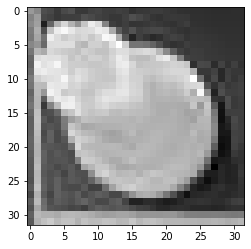

In [ ]:
my_data = np.genfromtxt("/content/images/0_0_0.CSV",delimiter=",")
print(train_labels[0])
my_data = np.asarray(my_data.astype(int))
#my_data = train_images[1]
#Plot an image to see what it looks like
plt.figure()
print(my_data)
plt.imshow(my_data, cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
# create a ZipFile object
zipObj = ZipFile('/content/vid.zip', 'w')
for x in range(0,8):
  for y in range(0,8):
    name = "/content/images/" + str(72) + "_" + str(x) + "_" + str(y) + ".CSV"
    my_data = np.genfromtxt(name,delimiter=",")
    name = str(x) + '_' + str(y) + '.txt'
    np.savetxt(name, my_data.flatten(), delimiter=',',fmt='%.16f') 
    zipObj.write(name)
# close the Zip File
zipObj.close()

12


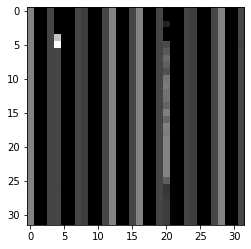

In [ ]:
#Plot an image to see what it looks like
plt.figure()
print(train_labels[10])
plt.imshow(train_images[10], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
count = np.zeros((13,), dtype=int)
for i in range(0,4740):
  temp = train_labels[i]
  count[temp] += 1;
print(count)
count = np.zeros((13,), dtype=int)
for i in range(0,1984):
  temp = test_labels[i]
  count[temp] += 1;
print(count)

[2357  105  105  105  105  144  144  144  144  144  144  550  549]
[992  31  31  31  31  62  62  62  62  62  62 248 248]


In [ ]:
#Empty spaces vs filled spaces
train_labels_1 = np.where(train_labels>0, 1, train_labels)
test_labels_1 = np.where(test_labels>0, 1, test_labels)


#No empty spaces
train_labels_2 = train_labels[train_labels != 0] -1
test_labels_2 = test_labels[test_labels != 0] -1
test_images_2 = test_images[test_labels != 0]
train_images_2 = train_images[train_labels != 0]

#No empty spaces, no pawns
train_labels_3 = train_labels_2[train_labels_2 < 10]
test_labels_3 = test_labels_2[test_labels_2 < 10]
test_images_3 = test_images_2[test_labels_2 < 10]
train_images_3 = train_images_2[train_labels_2 < 10]

#Combine same chess piece types together (regardless of color)
train_labels_4 = np.where(train_labels == 2, 1, train_labels)
train_labels_4 = np.where(train_labels_4 == 3, 2, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 4, 2, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 5, 3, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 6, 3, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 7, 4, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 8, 4, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 9, 5, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 10, 5, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 11, 6, train_labels_4)
train_labels_4 = np.where(train_labels_4 == 12, 6, train_labels_4)

test_labels_4 = np.where(test_labels == 2, 1, test_labels)
test_labels_4 = np.where(test_labels_4 == 3, 2, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 4, 2, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 5, 3, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 6, 3, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 7, 4, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 8, 4, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 9, 5, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 10, 5, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 11, 6, test_labels_4)
test_labels_4 = np.where(test_labels_4 == 12, 6, test_labels_4)

In [ ]:
print("Train_Labels_1 Shape: ", end="")
print(train_labels_1.shape)
print("Train_Labels_2 Shape: ", end="")
print(train_labels_2.shape)
print("Test_Labels_2 Shape: ", end="")
print(test_labels_2.shape)
print("Train_Labels_3 Shape: ", end="")
print(train_labels_3.shape)
print("Train_Labels_4 Shape: ", end="")
print(train_labels_4.shape)

Train_Labels_1 Shape: (4740,)
Train_Labels_2 Shape: (2383,)
Test_Labels_2 Shape: (992,)
Train_Labels_3 Shape: (1284,)
Train_Labels_4 Shape: (4740,)


In [ ]:
count = np.zeros((2,), dtype=int)
for i in range(0,4740):
  temp = train_labels_1[i]
  count[temp] += 1;
print(count)

[2357 2383]


In [ ]:
#Lower amount of empty spaces
train_labels_0 = train_labels[train_labels == 0]
train_images_0 = train_images[train_labels == 0]
print(train_labels_0.shape)
train_labels_0 = train_labels_0[0:1000]
train_images_0 = train_images_0[0:1000]
print(train_images_0.shape)
train_labels_spaces = train_labels[train_labels != 0]
train_images_spaces = train_images[train_labels != 0]
train_images_spaces = np.append(train_images_spaces,train_images_0, axis = 0)
train_labels_spaces = np.append(train_labels_spaces, train_labels_0, axis = 0)
print(train_images_spaces.shape)

(2357,)
(1000, 32, 32, 1)
(3383, 32, 32, 1)


In [ ]:
count = np.zeros((13,), dtype=int)
for i in range(0,3383):
  temp = train_labels_spaces[i]
  count[temp] += 1;
print(count)

[1000  105  105  105  105  144  144  144  144  144  144  550  549]


In [ ]:
#Lower amount of pawns
train_labels_0 = train_labels[train_labels == 11]
train_images_0 = train_images[train_labels == 11]
print(train_labels_0.shape)
train_labels_0 = train_labels_0[0:200]
train_images_0 = train_images_0[0:200]
print(train_images_0.shape)
train_images_spaces = train_images_spaces[train_labels_spaces != 11]
train_labels_spaces = train_labels_spaces[train_labels_spaces != 11]
train_images_spaces = np.append(train_images_spaces,train_images_0, axis = 0)
train_labels_spaces = np.append(train_labels_spaces, train_labels_0, axis = 0)
print(train_images_spaces.shape)

train_labels_0 = train_labels[train_labels == 12]
train_images_0 = train_images[train_labels == 12]
print(train_labels_0.shape)
train_labels_0 = train_labels_0[0:200]
train_images_0 = train_images_0[0:200]
print(train_images_0.shape)
train_images_spaces = train_images_spaces[train_labels_spaces != 12]
train_labels_spaces = train_labels_spaces[train_labels_spaces != 12]
train_images_spaces = np.append(train_images_spaces,train_images_0, axis = 0)
train_labels_spaces = np.append(train_labels_spaces, train_labels_0, axis = 0)
print(train_images_spaces.shape)

(550,)
(200, 32, 32, 1)
(3033, 32, 32, 1)
(549,)
(200, 32, 32, 1)
(2684, 32, 32, 1)


In [ ]:
count = np.zeros((13,), dtype=int)
for i in range(0,2684):
  temp = train_labels_spaces[i]
  count[temp] += 1;
print(count)

[1000  105  105  105  105  144  144  144  144  144  144  200  200]


In [55]:
#Build the neuralnet model
input_rows = 32
input_cols = 32
#Implementation
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(input_rows, input_cols, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(13, activation='softmax'))
#Review the overall model structure
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 8)         80        
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 13)               

In [54]:
#Reshape the image so it can train in batch (and fit the model's input shape)
train_images = train_images.reshape((4740, 32, 32, 1))
test_images = test_images.reshape((1984, 32, 32, 1))
#train_images_spaces = train_images_spaces.reshape((2684,32,32,1))
#train_images_2 = train_images_2.reshape((2383, 32, 32,1))
#test_images_2 = test_images_2.reshape((992, 32, 32,1))
#train_images_3 = train_images_3.reshape((1152, 32, 32,1))
#test_images_3 = test_images_3.reshape((496, 32, 32,1))

In [ ]:
print(test_images.shape)
print(train_images.shape)

(1984, 32, 32, 1)
(4740, 32, 32, 1)


In [56]:
#Training the model
#Hint: change optimizer to 'sgd'(originally adam), and increase epochs if result is bad.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
149/149 [==============================] - 1s 5ms/step - loss: 8.7805 - accuracy: 0.5181
Epoch 2/5
149/149 [==============================] - 1s 5ms/step - loss: 1.6303 - accuracy: 0.6888
Epoch 3/5
149/149 [==============================] - 1s 5ms/step - loss: 1.0192 - accuracy: 0.7568
Epoch 4/5
149/149 [==============================] - 1s 5ms/step - loss: 0.7277 - accuracy: 0.8099
Epoch 5/5
149/149 [==============================] - 1s 5ms/step - loss: 0.5645 - accuracy: 0.8428


In [57]:
#Evaluate the performance with testing dataset
print("Accuracy of this model is:")
model.evaluate(test_images, test_labels)

Accuracy of this model is:
62/62 [==============================] - 0s 3ms/step - loss: 1.1135 - accuracy: 0.7540


[1.1135380268096924, 0.7540322542190552]

In [58]:
print("Accuracy of this model is:")
model.evaluate(test_images[0:64], test_labels[0:64])

Accuracy of this model is:
2/2 [==============================] - 0s 8ms/step - loss: 0.8260 - accuracy: 0.7969


[0.8260469436645508, 0.796875]

In [33]:
#View the total number of parameters, so it doesn't overflow the LCDK's memory
print("Total amount of parameter of model is:", model.count_params())

Total amount of parameter of model is: 7333


In [ ]:
print(test_labels[0]) 
t = test_images[0]
t = t.reshape(1,32,32,1)
print(t.shape)
#print("Test for black king: ")
print(np.floor(np.multiply(model.predict(t),100)))
print("\n")

10
(1, 32, 32, 1)
[[99.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]




In [52]:
y = model.predict(test_images)
predictions = np.zeros(1984)
for i in range(0,1984):
  max_index = np.argmax(y[i])
  predictions[i] = max_index
confusion  =  tf.math.confusion_matrix(test_labels, predictions)
print(confusion)
print(predictions)

tf.Tensor(
[[988   0   0   1   0   1   0   0   0   0   0   2   0]
 [  0  25   0   1   0   3   0   2   0   0   0   0   0]
 [  0   0  20   0   1   0   4   0   0   0   1   3   2]
 [  0  14   0   0   0   8   0   3   0   1   0   5   0]
 [  0   0  14   0   7   0   2   0   0   0   4   1   3]
 [  0  18   0   2   0  20   0   7   0  11   0   4   0]
 [  0   0  15   0   9   0   8   0   0   1   5  14  10]
 [  0  25   0   0   0   1   0  21   0   4   0  11   0]
 [  0   0  26   0   4   0   1   0   5   0   4  10  12]
 [  0   9   0   3   0   2   0   3   0  40   0   5   0]
 [  0   0  17   0   0   0   6   0   1   0  32   0   6]
 [  0   1   0   2   0   0   0   3   0   5   0 237   0]
 [  0   0  22   1   4   0   0   1   2   0   0  11 207]], shape=(13, 13), dtype=int32)
[11.  9.  5. ...  0.  0.  0.]


# Chess Testing

In [ ]:
print(test_labels[0]) 
t = test_images[0]
t = t.reshape(1,32,32,1)
print(t.shape)
#print("Test for black king: ")
h= np.floor(np.multiply(model.predict(t),100))
print(h)
print("\n")


10
(1, 32, 32, 1)
[[ 5.  0.  0.  3.  0.  1. 87.  0.  0.  0.  0.  0.  0.]]




In [53]:
for i in range(0,64):
  actual = test_labels[i]
  t = test_images[i]
  t = t.reshape(1,32,32,1)
  guess = np.floor(np.multiply(model.predict(t),100))
  v=-1
  ans = -1
  for j in range(0,13):
    if (guess[0][j]) > v:
      v = guess[0][j]
      ans = j;
  print("Actual piece: " + str(actual) + "   Guessed piece: " + str(ans))
  print("\n")

Actual piece: 9   Guessed piece: 11


Actual piece: 7   Guessed piece: 9


Actual piece: 5   Guessed piece: 5


Actual piece: 3   Guessed piece: 11


Actual piece: 1   Guessed piece: 1


Actual piece: 5   Guessed piece: 5


Actual piece: 7   Guessed piece: 7


Actual piece: 9   Guessed piece: 9


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 11   Guessed piece: 11


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Guessed piece: 0


Actual piece: 0   Gu

# Export Values

In [ ]:
#Example for extract parameter form the first conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
m1, b1 = model.layers[0].get_weights()

w1 = np.empty((8,3,3))
for x in range(0,8):
  for u in range(0,3):
    for v in range(0,3):
      w1[x][u][v] = m1[u][v][0][x]
print(np.shape(w1))
print(np.shape(b1))
np.savetxt('w1.txt', w1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b1.txt', b1.flatten(), delimiter=',',fmt='%.16f')  

(8, 3, 3)
(8,)


In [ ]:
print(b1.shape)

(16,)


In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
m2, b2 = model.layers[2].get_weights()



#Original Format:
#    height, width, input, output
#    [3,3,8,8]

#Desired Format
#    input, output, height, width
#    [8,8,3,3]


w2 = np.empty((8,8,3,3))
for inf in range(0,8):
  for outf in range(0,8):
    for h in range(0,3):
      for w in range(0,3):
        w2[outf][inf][h][w] =m2[h][w][inf][outf]

#print(w2[0][0][0][0])
print(np.shape(w2))
print(np.shape(b2))
np.savetxt('w2.txt', w2.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b2.txt', b2.flatten(), delimiter=',',fmt='%.16f') 

(8, 8, 3, 3)
(8,)


In [ ]:
# conv layer 3
m3, b3 = model.layers[4].get_weights()
# print(np.shape(w3))
# print(np.shape(b3))

w3 = np.empty((8,8,3,3))
for inf in range(0,8):
  for outf in range(0,8):
    for h in range(0,3):
      for w in range(0,3):
        w3[outf][inf][h][w] =m3[h][w][inf][outf]

np.savetxt('w3.txt', w3.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b3.txt', b3.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
w4, b4 = model.layers[5].get_weights()
print(np.shape(w4))
print(np.shape(b4))
#w4 = np.transpose(w4)
print(np.shape(w4))
np.savetxt('w4.txt', w4.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b4.txt', b4.flatten(), delimiter=',',fmt='%.16f') 

(512, 13)
(13,)
(512, 13)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
